In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('/content/drive/MyDrive/캡스톤 데이터 분석/data/빅카인즈 뉴스데이터(2022.1029_20231130).csv', encoding='cp949')
data2 = pd.read_excel('/content/drive/MyDrive/캡스톤 데이터 분석/data/(최종)이해관계자 총리스트.xlsx')


In [ ]:
news = data1[['일자', '언론사', '키워드']]
len(news)

8072

In [ ]:
news.head()

,일자,언론사,키워드
0,20231130,브레이크뉴스,"정기현,대전시의원,총선,출마,선언,정기현,대전시,의원,총선,출마,선언,사진,정치부기..."
1,20231130,중앙일보,"공군,학사,사관,후보,임관,여군,최다,역대,사진,전송시간,기준,한눈,파악,실시간,업..."
2,20231130,동아일보,"2년,정신,건강,검진,맞춤관리,국민,생애,주기,맞춤,관리,정부,국민,생애주기별,정신..."
3,20231129,경향신문,"엑스포,박빙,성적표,시민,실망,실망,29일,7시,분쯤,번화가,부산,최대,서면,버스정..."
4,20231128,아시아경제,"최고,전남,소방,구급,대원,역량,전국,수준,입증,소방청,주관,재난,현장,훈련,평가,..."


In [ ]:
news['id'] = news.index+1

<ipython-input-7-c40957d8b7b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['id'] = news.index+1


In [ ]:
news = news[['id', '일자', '언론사', '키워드']]

In [ ]:
news.head()

,id,일자,언론사,키워드
0,1,20231130,브레이크뉴스,"정기현,대전시의원,총선,출마,선언,정기현,대전시,의원,총선,출마,선언,사진,정치부기..."
1,2,20231130,중앙일보,"공군,학사,사관,후보,임관,여군,최다,역대,사진,전송시간,기준,한눈,파악,실시간,업..."
2,3,20231130,동아일보,"2년,정신,건강,검진,맞춤관리,국민,생애,주기,맞춤,관리,정부,국민,생애주기별,정신..."
3,4,20231129,경향신문,"엑스포,박빙,성적표,시민,실망,실망,29일,7시,분쯤,번화가,부산,최대,서면,버스정..."
4,5,20231128,아시아경제,"최고,전남,소방,구급,대원,역량,전국,수준,입증,소방청,주관,재난,현장,훈련,평가,..."


In [ ]:
data2.head()

,이해관계자 리스트,대분류,중분류,소분류
0,검찰청사,공공,정부,사법기관
1,특수수사본부,공공,정부,사법기관
2,울산광역시의회,정치 및 사회 조직,정치,지방의회
3,상황관리협력관,공공,정부,행정 지원
4,서대문경찰서,공공,정부,치안 유지 기관


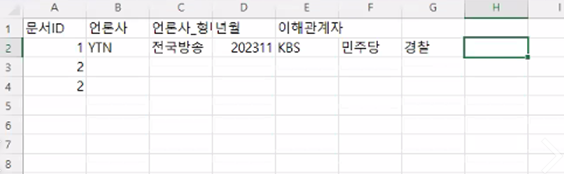

In [ ]:
# 이해관계자 리스트 추출
stakeholders = data2['이해관계자 리스트'].tolist()

# 각 뉴스 기사 아이디별로 키워드에서 이해관계자 리스트 추출
extracted_stakeholders = []
for idx, row in news.iterrows():
    keywords = row['키워드'].split(',')
    matched_stakeholders = [stakeholder for stakeholder in stakeholders if stakeholder in keywords]
    extracted_stakeholders.append(', '.join(matched_stakeholders))

# 새로운 열로 추가
news['이해관계자'] = extracted_stakeholders

In [ ]:
news.to_csv('/content/drive/MyDrive/캡스톤 데이터 분석/data/결과.csv')

In [ ]:
news.to_excel('/content/drive/MyDrive/캡스톤 데이터 분석/data/결과.xlsx')